# Home task : KNN classification
1. `iris` dataset
    - load `iris` dataset
    - split to train and test
    - train KNN classifiers for different `K`
    - choose the best `K` determined on test set

2. synthetic dataset
    - generrate synthetic dataset
    - split to train and test
    - train KNN regressors for different `K`
    - choose the best `K` determined on test set
    - visualize the decision boundary 

In [3]:
# Install libraries from requirements.txt
%pip install -r "C:\Users\DELL\Documents\GitHub\Data_Science\requirements.txt"

Note: you may need to restart the kernel to use updated packages.


ERROR: Ignored the following yanked versions: 0.0.post2
ERROR: Could not find a version that satisfies the requirement sklearn==1.5.1 (from versions: 0.0, 0.0.post1, 0.0.post4, 0.0.post5, 0.0.post7, 0.0.post9, 0.0.post10, 0.0.post11, 0.0.post12)
ERROR: No matching distribution found for sklearn==1.5.1


In [30]:
# Import libraries
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

## `Iris` dataset 

In [2]:
np.random.seed = 2021

iris = load_iris()

print ('data contains:',iris.keys())

X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [5]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int32  
 5   label_names        150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [6]:
df_iris['label_names'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### Split to train and test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

### Train KNN classifiers for different `K`

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

k_values = [1, 3, 5, 7, 9]
accuracy_scores = []

for k in k_values:
    print(f"\nTraining KNN with K={k}...")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    print(f"Results for K={k}:")
    print(f" - Accuracy: {accuracy:.4f}")
    print(" - Classification Report:")
    print(classification_report(y_test, y_pred))


Training KNN with K=1...
Results for K=1:
 - Accuracy: 0.9556
 - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.94      0.94      0.94        16
           2       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45


Training KNN with K=3...
Results for K=3:
 - Accuracy: 0.9778
 - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.94      0.97        16
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45


Training KNN with K=5...
Results for K=5:
 - Accuracy: 0.97

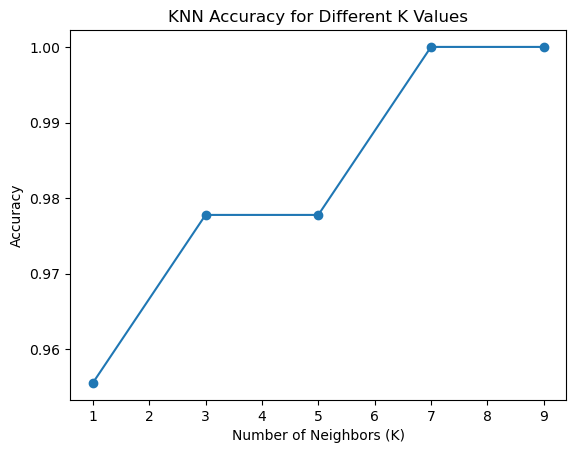

In [15]:
# Plot accuracy vs K
plt.figure()
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values')
plt.show()

### Choose the best `K` determined on test set

In [16]:
best_k = k_values[np.argmax(accuracy_scores)]
print(f"\nBest K determined from test set: {best_k}")


Best K determined from test set: 7


## Synthetic dataset 

### Generrate synthetic dataset

In [19]:
# Generate synthetic dataset for regression
X_syn, y_syn = make_regression(n_samples=200, n_features=1, noise=15, random_state=2021) 

#### Split to train and test

In [23]:
# Split into training and testing sets
X_train_syn, X_test_syn, y_train_syn, y_test_syn = train_test_split(X_syn, y_syn, test_size=0.3, random_state=2021)

#### Train KNN regressors for different `K`

In [24]:
# Train KNN regressors for different values of K
k_values = [1, 3, 5, 7, 9]
mse_scores = []

for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train_syn, y_train_syn)
    y_pred_syn = knn_reg.predict(X_test_syn)
    mse = mean_squared_error(y_test_syn, y_pred_syn)
    mse_scores.append(mse)
    
    print(f'\nResults for K={k} in Regression:')
    print("Mean Squared Error:", mse)


Results for K=1 in Regression:
Mean Squared Error: 432.507100655801

Results for K=3 in Regression:
Mean Squared Error: 279.84325471017087

Results for K=5 in Regression:
Mean Squared Error: 264.4347610934857

Results for K=7 in Regression:
Mean Squared Error: 245.68779386371173

Results for K=9 in Regression:
Mean Squared Error: 221.97238688612035


#### Choose the best `K` determined on test set

In [25]:
# Determine the best K for regression
best_k_reg = k_values[np.argmin(mse_scores)]
print(f"\nBest K for regression determined from test set: {best_k_reg}")


Best K for regression determined from test set: 9


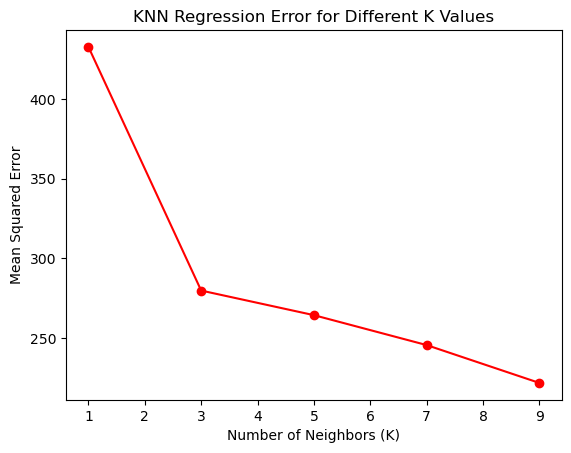

In [27]:
# Plot MSE vs K
plt.figure()
plt.plot(k_values, mse_scores, marker='o', color='r')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error')
plt.title('KNN Regression Error for Different K Values')
plt.show()

#### Visualize the decision boundary 

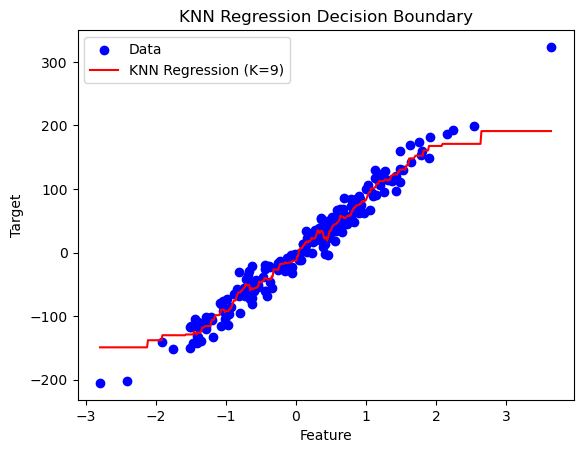

In [29]:
# Visualize the decision boundary for regression
X_grid = np.linspace(min(X_syn), max(X_syn), 500).reshape(-1, 1)
knn_regressor = KNeighborsRegressor(n_neighbors=best_k_reg)
knn_regressor.fit(X_syn, y_syn)
y_grid_pred = knn_regressor.predict(X_grid)

plt.figure()
plt.scatter(X_syn, y_syn, color='b', label='Data')
plt.plot(X_grid, y_grid_pred, color='r', label=f'KNN Regression (K={best_k_reg})')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('KNN Regression Decision Boundary')
plt.legend()
plt.show()